# 外れ値にラベルをつける①
ホテリングの$T^2$法を使用して、正規分布で分布しているデータに含まれる外れ値にラベルをつけます。

## 実験用のデータ
`stats.norm.rvs(size=n_samples)`として正規分布からデータを作成し、その中にいくつかを外れ値を追加します。

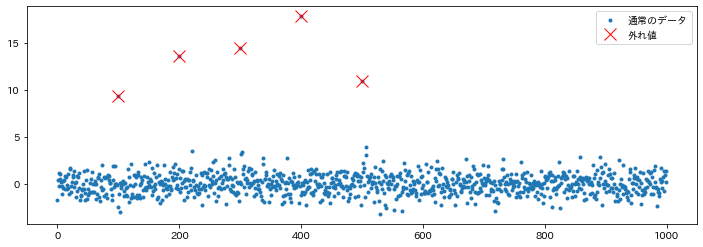

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

# 乱数固定のための指定
np.random.seed(seed=100)

# 実験用のデータ
n_samples = 1000
x = stats.norm.rvs(size=n_samples)
ind = [i for i in range(n_samples)]

# 外れ値のインデックス
anom_ind = [
    100,
    200,
    300,
    400,
    500,
]
for an_i in anom_ind:
    x[an_i] += np.random.randint(10, 20)

# プロットして確認
plt.figure(figsize=(12, 4))
plt.plot(ind, x, ".", label="通常のデータ")
plt.plot(anom_ind, x[anom_ind], "x", label="外れ値", c="red", markersize=12)
plt.legend()
plt.show()

## 外れ値を検出する
標本の平均値と分散を求め、そこから標本ごとの異常度のスコアを求めます。
予め指定した閾値を超えた異常度を持つデータを、外れ値として検出します。

In [2]:
from __future__ import annotations


def get_anomaly_index(X: np.array, threshold: float) -> list[int]:
    """一次元データ用外れ値インデックス取得

    １次元のデータから異常値のインデックスを取得します

    Args:
        data (numpy.array): 検出対象のデータ
        threshold (float): 外れ値として扱う閾値.

    Returns:
        list[int]: 外れ値であるデータのインデックスのリスト

    Examples:
        >>> print(get_anomaly_index(np.array([1, 2, 3, ..., 1]), 0.05))
        [1, ]
    """
    avg = np.average(X)
    var = np.var(X)
    scores = [(x_i - avg) ** 2 / var for x_i in X]
    th = stats.chi2.interval(1 - threshold, 1)[1]
    return [ind for (ind, x) in enumerate(scores) if x > th]

## 実際に検出できたかを確認する

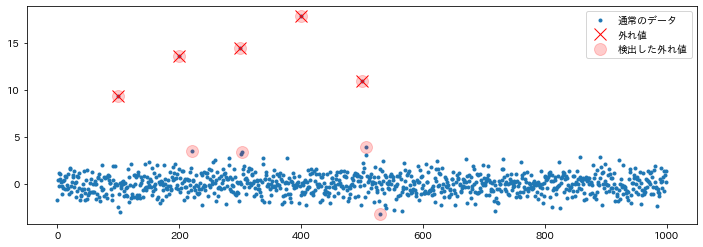

In [3]:
detected_anom_index = get_anomaly_index(x, 0.05)

# プロットして確認
plt.figure(figsize=(12, 4))
plt.plot(ind, x, ".", label="通常のデータ")
plt.plot(anom_ind, x[anom_ind], "x", label="外れ値", c="red", markersize=12)
plt.plot(
    detected_anom_index,
    x[detected_anom_index],
    "o",
    label="検出した外れ値",
    c="red",
    alpha=0.2,
    markersize=12,
)
plt.legend()
plt.show()